In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set_style('dark')
%pip install pycountry_convert
import pycountry_convert as pc

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# from https://stackoverflow.com/questions/55910004/get-continent-name-from-country-using-pycountry

def country_to_continent(row):
    country_name=row['Country']

    Europe_list=['Euro area','Britain']
    if country_name in Europe_list:
        return 'Europe'
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    
    return country_continent_name

In [3]:
%pip install xlrd
big_mac_df=pd.read_excel('data/big-mac-2022-07-01.xls',sheet_name=0)
big_mac_df.head()

Note: you may need to restart the kernel to use updated packages.


,Country,iso_a3,currency_code,local_price,dollar_ex,dollar_price,dollar_ppp,GDP_bigmac,dollar_valuation,euro_valuation,sterling_valuation,yen_valuation,yuan_valuation,dollar_adj_valuation,euro_adj_valuation,sterling_adj_valuation,yen_adj_valuation,yuan_adj_valuation
0,Switzerland,CHE,CHF,6.50,0.96845,6.711756,1.262136,67857.662938,30.325,40.853,51.165,137.261,88.694,31.013,25.768,39.572,127.382,51.915
1,Norway,NOR,NOK,62.00,9.89765,6.264113,12.038835,63567.854704,21.633,31.459,41.083,121.436,76.109,24.323,19.346,32.445,115.772,44.158
2,Uruguay,URY,UYU,255.00,41.91000,6.084467,49.514563,14726.863618,18.145,27.689,37.037,115.086,71.058,49.213,43.239,58.961,158.970,73.019
3,Sweden,SWE,SEK,57.00,10.19785,5.589413,11.067961,46516.137374,8.532,17.300,25.888,97.586,57.141,18.845,14.087,26.609,106.264,37.806
4,Canada,CAN,CAD,6.77,1.28915,5.251522,1.314563,49674.334129,1.971,10.209,18.277,85.641,47.641,10.205,5.793,17.404,91.268,27.787


In [4]:
big_mac_df.Country.unique()

array(['Switzerland', 'Norway', 'Uruguay', 'Sweden', 'Canada',
       'United States', 'Lebanon', 'Israel', 'United Arab Emirates',
       'Euro area', 'Australia', 'Argentina', 'Saudi Arabia', 'Britain',
       'New Zealand', 'Brazil', 'Bahrain', 'Singapore', 'Kuwait',
       'Czech Republic', 'Costa Rica', 'Nicaragua', 'Sri Lanka', 'Oman',
       'Croatia', 'Chile', 'Honduras', 'Poland', 'Peru', 'Qatar', 'China',
       'South Korea', 'Thailand', 'Colombia', 'Mexico', 'Guatemala',
       'Jordan', 'Pakistan', 'Moldova', 'Vietnam', 'Japan', 'Azerbaijan',
       'Philippines', 'Turkey', 'Hong Kong', 'Hungary', 'Taiwan',
       'Malaysia', 'Egypt', 'India', 'South Africa', 'Indonesia',
       'Romania', 'Venezuela'], dtype=object)

In [5]:
big_mac_df.columns

Index(['Country', 'iso_a3', 'currency_code', 'local_price', 'dollar_ex',
       'dollar_price', 'dollar_ppp', 'GDP_bigmac', 'dollar_valuation',
       'euro_valuation', 'sterling_valuation', 'yen_valuation',
       'yuan_valuation', 'dollar_adj_valuation', 'euro_adj_valuation',
       'sterling_adj_valuation', 'yen_adj_valuation', 'yuan_adj_valuation'],
      dtype='object')

In [6]:
xrate_index_df=big_mac_df[['Country','dollar_ex','dollar_ppp']]

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The Big Mac Index and Currency Exchange Rate')

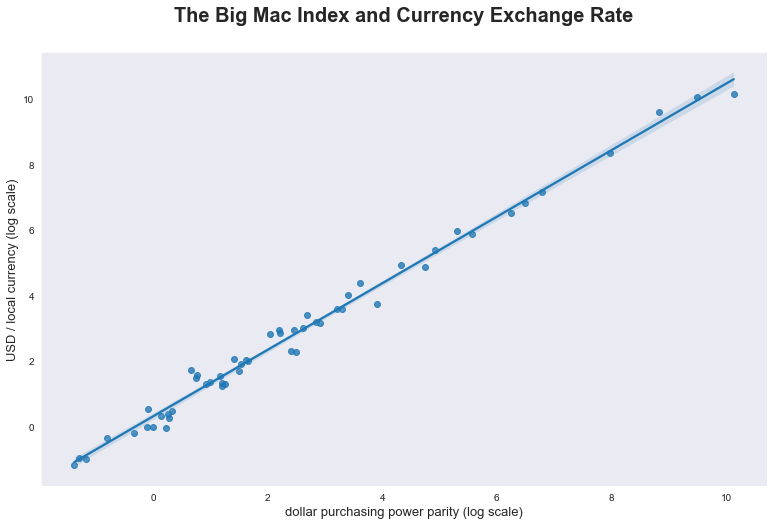

In [30]:
_,ax=plt.subplots(1,1,figsize=(13,8))
sns.regplot(np.log(xrate_index_df['dollar_ppp']),np.log(xrate_index_df['dollar_ex']),data=xrate_index_df,ax=ax)
ax.set_xlabel('dollar purchasing power parity (log scale)',fontsize=13)
ax.set_ylabel('USD / local currency (log scale)',fontsize=13)
ax.set_title('The Big Mac Index and Currency Exchange Rate',fontsize=20,fontweight='bold',pad=30)

## variance by continent

In [20]:
xrate_index_df['Continent']=xrate_index_df.apply(country_to_continent,axis=1)
xrate_index_df.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18196\182027112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xrate_index_df['Continent']=xrate_index_df.apply(country_to_continent,axis=1)


,Country,dollar_ex,dollar_ppp,Continent
0,Switzerland,0.96845,1.262136,Europe
1,Norway,9.89765,12.038835,Europe
2,Uruguay,41.91000,49.514563,South America
3,Sweden,10.19785,11.067961,Europe
4,Canada,1.28915,1.314563,North America


In [23]:
xrate_index_df.groupby('Continent')['dollar_ppp'].std()

Continent
Africa              0.837544
Asia             5684.890793
Europe             58.585408
North America     190.609936
Oceania             0.054921
South America    1071.145688
Name: dollar_ppp, dtype: float64

## Hue by continent

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The Big Mac Index and Currency Exchange Rate')

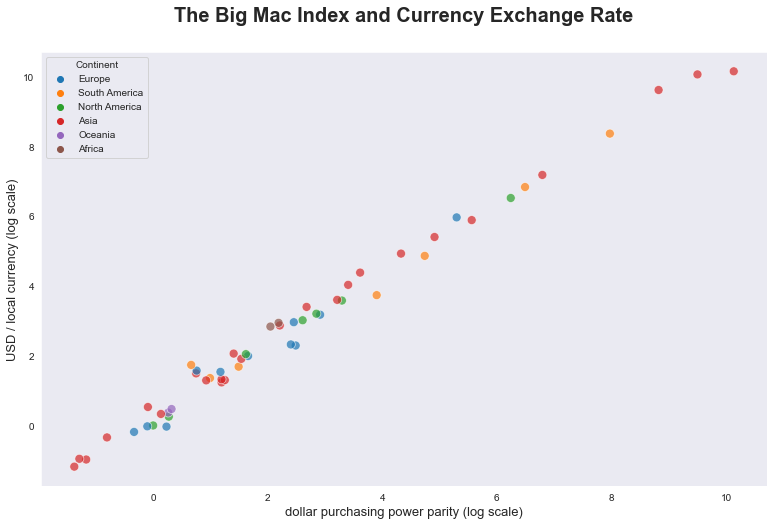

In [13]:
_,ax=plt.subplots(1,1,figsize=(13,8))
sns.scatterplot(np.log(xrate_index_df['dollar_ppp']),np.log(xrate_index_df['dollar_ex']),ax=ax,hue='Continent',data=xrate_index_df,s=80,alpha=.7)
ax.set_xlabel('dollar purchasing power parity (log scale)',fontsize=13)
ax.set_ylabel('USD / local currency (log scale)',fontsize=13)
ax.set_title('The Big Mac Index and Currency Exchange Rate',fontsize=20,fontweight='bold',pad=30)

In [9]:
xrate_index_df.groupby('Continent')['dollar_ppp'].count()

Continent
Africa            2
Asia             25
Europe           11
North America     7
Oceania           2
South America     7
Name: dollar_ppp, dtype: int64

# distribution by continent